In [1]:
from utils import win_loss_utils
import pandas as pd

win_loss_utils.save_data()

In [2]:
all_data, home_data, away_data = win_loss_utils.load_data()
print(all_data, home_data, away_data)

Start Date Result          Margin  Toss  Bat     Opposition      Ground  \
0    12 Jan 1990    won         92 runs  lost  1st     v Pakistan   Melbourne   
1    19 Jan 1990   draw               -  lost  2nd     v Pakistan    Adelaide   
2     3 Feb 1990   draw               -   won  2nd     v Pakistan      Sydney   
3    15 Mar 1990   lost       9 wickets   won  1st  v New Zealand  Wellington   
4    23 Nov 1990    won      10 wickets   won  2nd      v England    Brisbane   
..           ...    ...             ...   ...  ...            ...         ...   
330  12 Sep 2019   lost        135 runs   won  2nd      v England    The Oval   
331  21 Nov 2019    won   inns & 5 runs  lost  2nd     v Pakistan    Brisbane   
332  29 Nov 2019    won  inns & 48 runs   won  1st     v Pakistan    Adelaide   
333  12 Dec 2019    won        296 runs   won  1st  v New Zealand       Perth   
334  26 Dec 2019    won        247 runs  lost  1st  v New Zealand   Melbourne   

    Global Test ID               

In [3]:
all_data, home_data, away_data = win_loss_utils.load_data()
all_data["Start Date"] = pd.to_datetime(all_data["Start Date"], format="%d %b %Y")
home_data["Start Date"] = pd.to_datetime(home_data["Start Date"], format="%d %b %Y")
away_data["Start Date"] = pd.to_datetime(away_data["Start Date"], format="%d %b %Y")

In [4]:
win_loss_by_year = all_data.copy()
win_loss_by_year["Start Date"] = win_loss_by_year["Start Date"].apply(lambda date: date.year)
win_loss_by_year = win_loss_by_year.groupby(by="Start Date")

win_loss_by_year = win_loss_by_year["Result"].value_counts(normalize=True)
win_loss_by_year = win_loss_by_year.reset_index(name="Matches")

wins_by_year = win_loss_by_year.loc[win_loss_by_year["Result"] == "won"]
losses_by_year = win_loss_by_year.loc[win_loss_by_year["Result"] == "lost"]
draws_by_year = win_loss_by_year.loc[win_loss_by_year["Result"] == "draw"]

print(win_loss_by_year)

Start Date Result   Matches
0         1990    won  0.500000
1         1990   draw  0.333333
2         1990   lost  0.166667
3         1991   draw  0.400000
4         1991    won  0.400000
..         ...    ...       ...
76        2018    won  0.300000
77        2018   draw  0.100000
78        2019    won  0.666667
79        2019   draw  0.166667
80        2019   lost  0.166667

[81 rows x 3 columns]


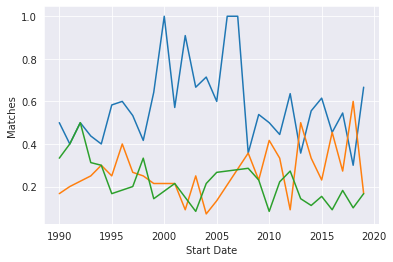

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")

sns.lineplot(x=wins_by_year["Start Date"], y=wins_by_year["Matches"])
sns.lineplot(x=losses_by_year["Start Date"], y=losses_by_year["Matches"])
sns.lineplot(x=draws_by_year["Start Date"], y=draws_by_year["Matches"])
plt.show()

In [6]:
def get_rolling_win_percentage(year : str, data : pd.DataFrame) -> pd.DataFrame:
    rolling_data = pd.get_dummies(data[["Start Date", "Result"]]).rolling(str(year * 365) + "D", on="Start Date").sum()
    rolling_data[["Result_won", "Result_lost", "Result_draw"]] = (rolling_data[["Result_won", "Result_lost", "Result_draw"]]
            .div(rolling_data[["Result_won", "Result_lost", "Result_draw"]].sum(axis=1), axis=0))
    
    rolling_data = rolling_data.rename(columns={"Result_won": "Win", "Result_lost": "Loss", "Result_draw": "Draw", "Start Date": "Time"})

    cutoff = [1990 + i for i in range(year)]
    rolling_data = rolling_data[~rolling_data["Time"].dt.year.isin(cutoff)]

    rolling_data = rolling_data.set_index("Time")
    return rolling_data

## 1 Year Rolling Win Percentage

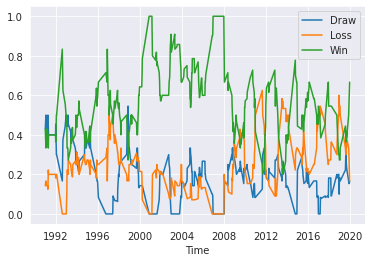

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

all_data_1y_rolling = get_rolling_win_percentage(1, all_data)
sns.lineplot(data=all_data_1y_rolling, dashes=False)


## 2 Year Rolling Win Percentage

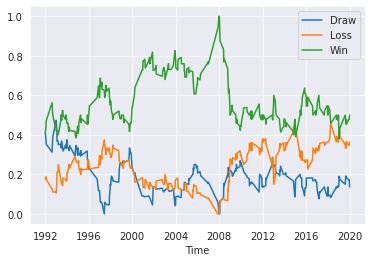

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

all_data_2y_rolling = get_rolling_win_percentage(2, all_data)
sns.lineplot(data=all_data_2y_rolling, dashes=False)

## 3 Year Rolling Win/Draw/Loss Percentage

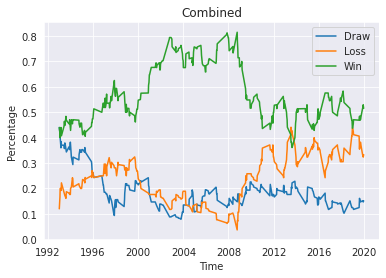

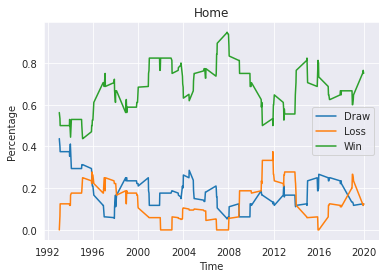

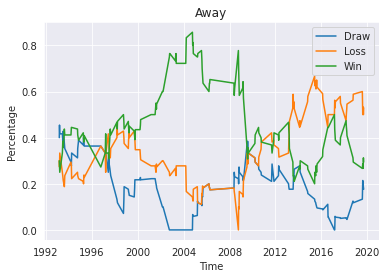

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

all_data_3y_rolling = get_rolling_win_percentage(3, all_data)
ax_combined = sns.lineplot(data=all_data_3y_rolling, dashes=False)
ax_combined.set(xlabel="Time", ylabel="Percentage", title="Combined")
plt.legend(loc='upper right')
plt.show()

home_data_3y_rolling = get_rolling_win_percentage(3, home_data)
ax_home = sns.lineplot(data=home_data_3y_rolling, dashes=False)
ax_home.set(xlabel="Time", ylabel="Percentage", title="Home")
plt.legend(loc='upper right')
plt.show()

away_data_3y_rolling = get_rolling_win_percentage(3, away_data)
ax_away = sns.lineplot(data=away_data_3y_rolling, dashes=False)
ax_away.set(xlabel="Time", ylabel="Percentage", title="Away")
plt.legend(loc='upper right')
plt.show()

## 5 Year Rolling Win/Draw/Loss Percentage

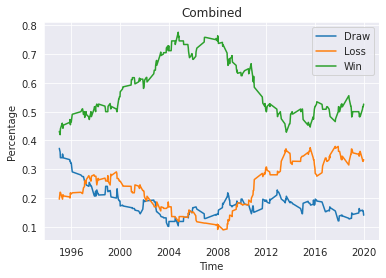

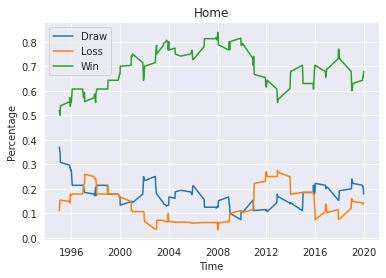

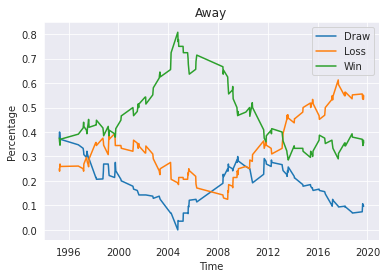

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

all_data_5y_rolling = get_rolling_win_percentage(5, all_data)
ax_combined = sns.lineplot(data=all_data_5y_rolling, dashes=False)
ax_combined.set(xlabel="Time", ylabel="Percentage", title="Combined")
plt.show()

home_data_5y_rolling = get_rolling_win_percentage(5, home_data)
ax_home = sns.lineplot(data=home_data_5y_rolling, dashes=False)
ax_home.set(xlabel="Time", ylabel="Percentage", title="Home")
plt.show()

away_data_5y_rolling = get_rolling_win_percentage(5, away_data)
ax_away = sns.lineplot(data=away_data_5y_rolling, dashes=False)
ax_away.set(xlabel="Time", ylabel="Percentage", title="Away")
plt.show()